In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# path of data 
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lm = LinearRegression()
lm

LinearRegression()

In [10]:
X=df[['highway-mpg']]
Y=df['price']

In [11]:
lm.fit(X,Y)

LinearRegression()

In [12]:
Yhat=lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [13]:
lm.intercept_

38423.3058581574

In [14]:
lm.coef_

array([-821.73337832])

In [15]:
lm1=LinearRegression()

In [16]:
X=df[['engine-size']]
Y=df['price']
lm1.fit(X,Y)
Yhat=lm1.predict(X)

In [17]:
lm1.intercept_
lm1.coef_

array([166.86001569])

In [18]:
lm1.intercept_

-7963.338906281046

In [19]:
Z=df[['horsepower','curb-weight','engine-size','highway-mpg']]

In [20]:
lm.fit(Z,df['price'])

LinearRegression()

In [21]:
lm.intercept_

-15806.624626329194

In [22]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [23]:
lm2=LinearRegression()

In [24]:
Z=df[['normalized-losses','highway-mpg']]
lm2.fit(Z,df['price'])

LinearRegression()

In [25]:
lm2.coef_

array([   1.49789586, -820.45434016])

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

(0.0, 48185.60736209794)

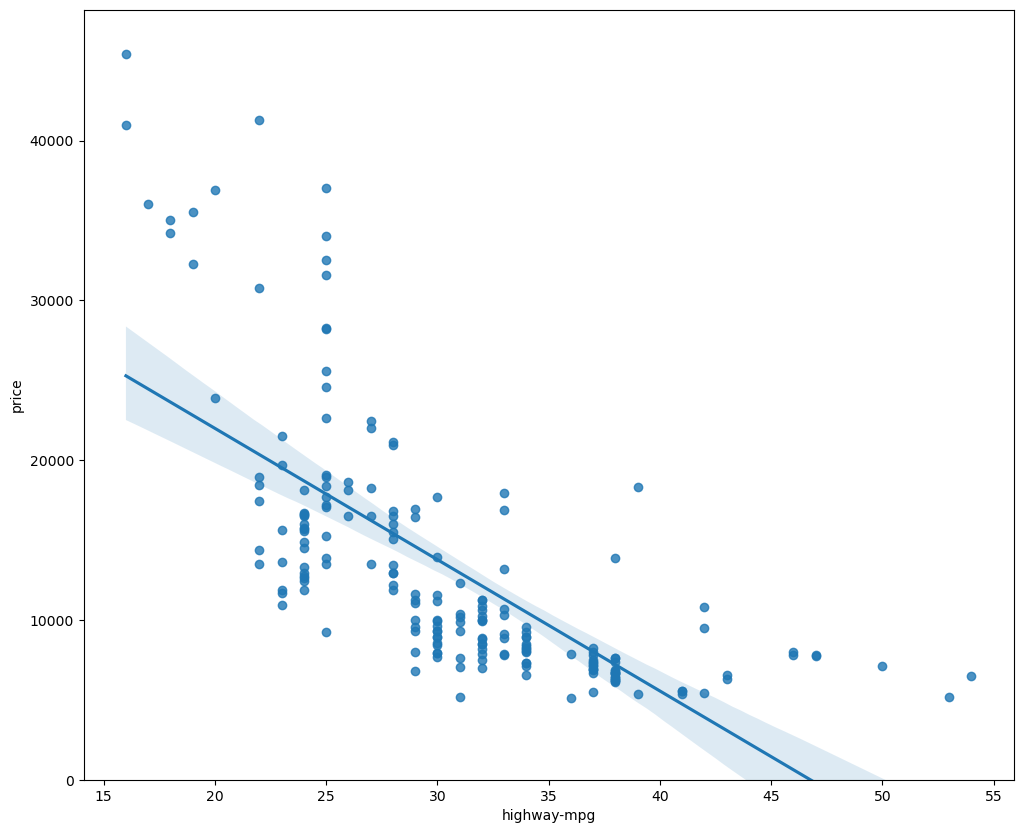

In [27]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0.0, 47414.1)

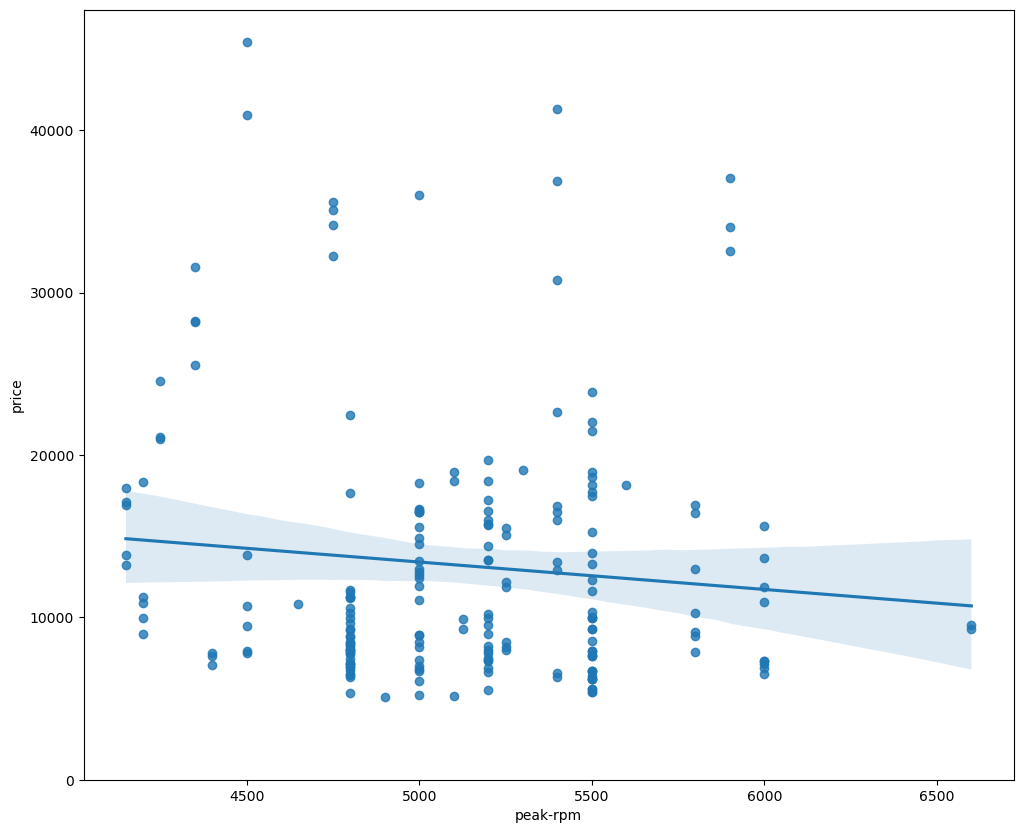

In [28]:
plt.figure(figsize=(width,height))
sns.regplot(x='peak-rpm',y='price',data=df)
plt.ylim(0,)

In [29]:
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


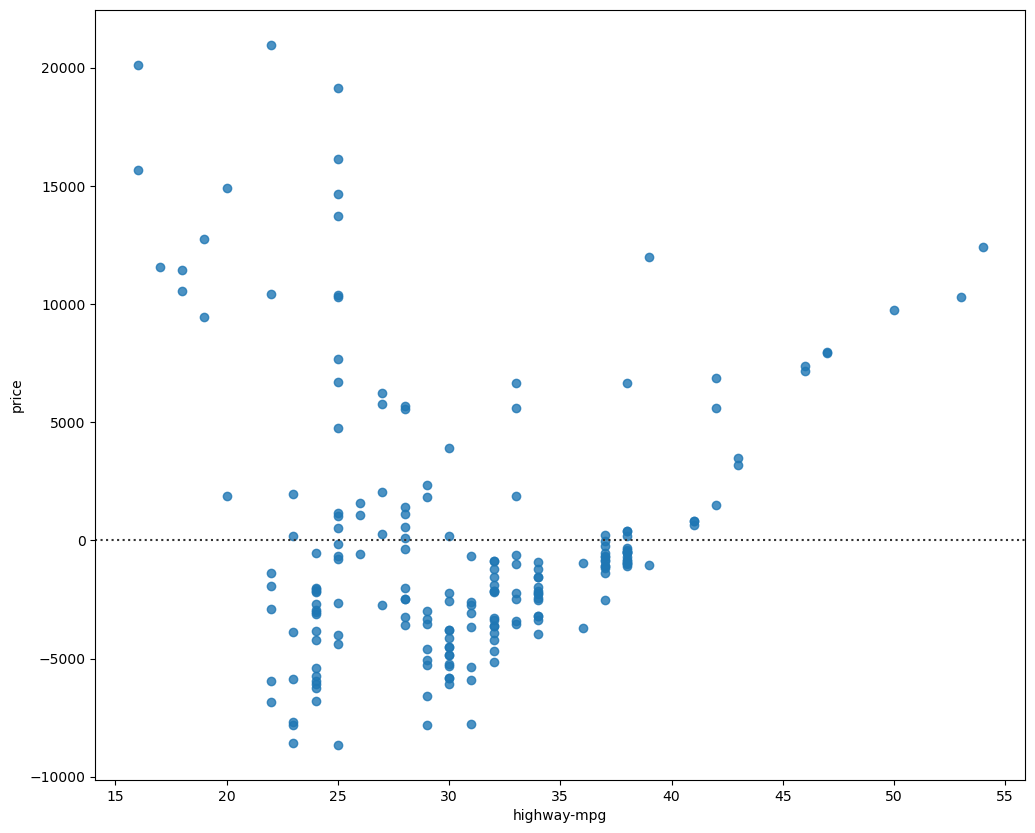

In [30]:
width=12
height=10
plt.figure(figsize=(width,height))
sns.residplot(x=df['highway-mpg'],y=df['price'])
plt.show()

In [31]:
Y_hat = lm.predict(df[['horsepower','curb-weight','engine-size','highway-mpg']])

C:\Users\HP\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


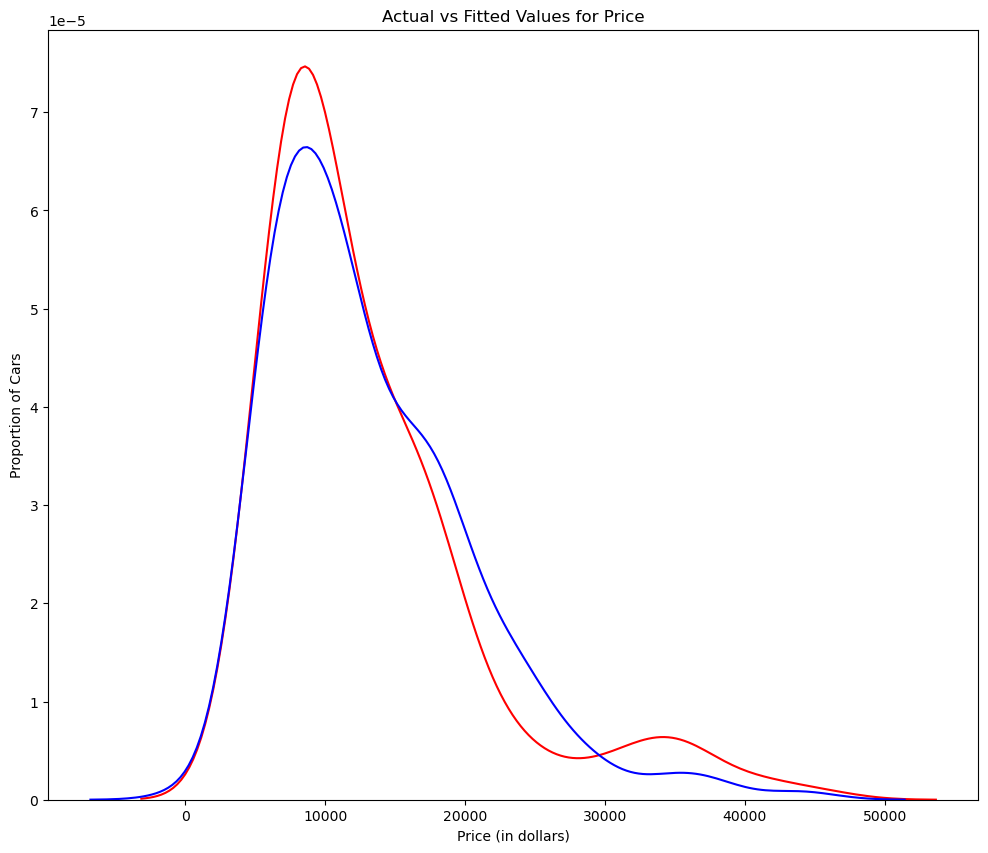

In [32]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [33]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [34]:
x=df['highway-mpg']
y=df['price']

In [35]:
f=np.polyfit(x,y,3)
p=np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


In [36]:
f

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

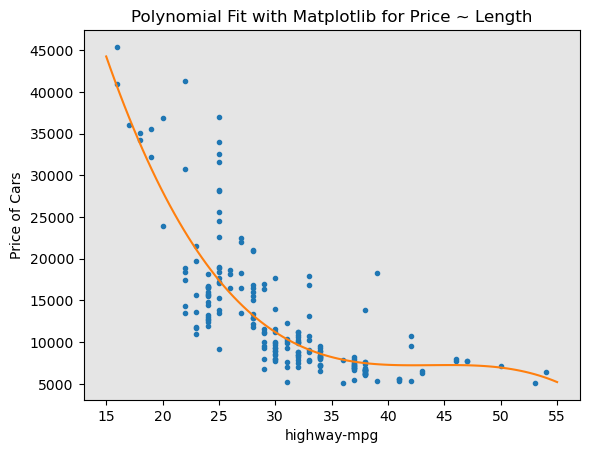

In [37]:
PlotPolly(p, x, y, 'highway-mpg')

In [38]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


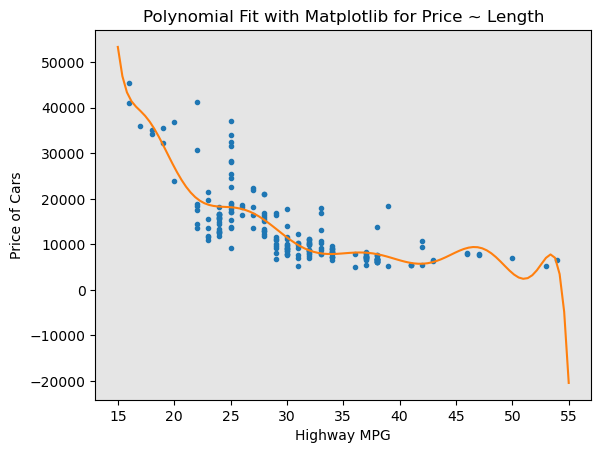

In [39]:
f1=np.polyfit(x,y,11)
p1=np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

In [40]:
from sklearn.preprocessing import PolynomialFeatures

In [41]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [42]:
Z_pr=pr.fit_transform(df[['horsepower','curb-weight','engine-size','highway-mpg']])

In [43]:
df[['horsepower','curb-weight','engine-size','highway-mpg']].shape

(201, 4)

In [44]:
Z_pr.shape

(201, 15)

In [45]:
Z_pr

array([[1.0000e+00, 1.1100e+02, 2.5480e+03, ..., 1.6900e+04, 3.5100e+03,
        7.2900e+02],
       [1.0000e+00, 1.1100e+02, 2.5480e+03, ..., 1.6900e+04, 3.5100e+03,
        7.2900e+02],
       [1.0000e+00, 1.5400e+02, 2.8230e+03, ..., 2.3104e+04, 3.9520e+03,
        6.7600e+02],
       ...,
       [1.0000e+00, 1.3400e+02, 3.0120e+03, ..., 2.9929e+04, 3.9790e+03,
        5.2900e+02],
       [1.0000e+00, 1.0600e+02, 3.2170e+03, ..., 2.1025e+04, 3.9150e+03,
        7.2900e+02],
       [1.0000e+00, 1.1400e+02, 3.0620e+03, ..., 1.9881e+04, 3.5250e+03,
        6.2500e+02]])

In [46]:
df[['horsepower','curb-weight','engine-size','highway-mpg']]

,horsepower,curb-weight,engine-size,highway-mpg
0,111.0,2548,130,27
1,111.0,2548,130,27
2,154.0,2823,152,26
3,102.0,2337,109,30
4,115.0,2824,136,22
...,...,...,...,...
196,114.0,2952,141,28
197,160.0,3049,141,25
198,134.0,3012,173,23
199,106.0,3217,145,27


In [47]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [48]:
Input=[('scaler',StandardScaler()),('polynomial',PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [49]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scaler', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [51]:
Z=Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [53]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([15388.77780567, 15388.77780567, 16771.84474515, 11641.85647791])

In [54]:
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([16231.78938339, 16231.78938339, 17052.24372355, 13833.33798916,
       20396.97271047, 17872.69806371, 17926.6223148 , 17872.69806371,
       22028.89401561, 14695.7334135 ])

In [55]:
lm.fit(X,Y)
lm.score(X,Y)

0.7609686443622008

In [56]:
Yhat=lm.predict(X)

In [57]:
Yhat[0:4]

array([13728.4631336 , 13728.4631336 , 17399.38347881, 10224.40280408])

In [58]:
from sklearn.metrics import mean_squared_error

In [59]:
mse=mean_squared_error(df['price'],Yhat)
print(mse)

15021126.025174143


In [60]:
lm.fit(Z,df['price'])
print(lm.score(Z,df['price']))

0.4966263556974877


In [61]:
Z=lm.predict(Z)
print(mean_squared_error(df['price'],Z))

31632832.975589436


In [62]:
from sklearn.metrics import r2_score

In [63]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


In [64]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [65]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [66]:
lm.fit(X, Y)
lm

LinearRegression()

In [67]:
yhat=lm.predict(new_input)
yhat[0:5]

C:\Users\HP\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-7796.47889059, -7629.6188749 , -7462.75885921, -7295.89884352,
       -7129.03882782])

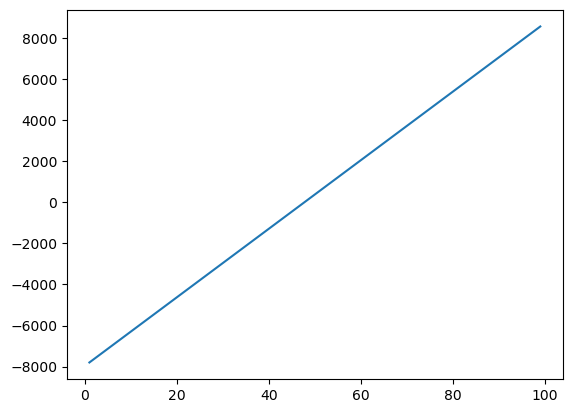

In [68]:
plt.plot(new_input, yhat)
plt.show()